# cvika 3


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pas_file_handling as pasfh
from pathlib import Path
from scipy import stats
import pas_graph as pasgr

import os
current_dir = os.getcwd()

import importlib
importlib.reload(pasgr)

<module 'pas_graph' from 'c:\\GitHub\\University-stuff-and-small-scale-projects\\1_University\\3_semestr\\pas\\pas_graph.py'>

Diastolický tlak – frekvenční rozdělení:

       n(i)  N(i)  f(i)  F(i)
diast                        
48        1     1  0.02  0.02
60        1     2  0.02  0.04
64        4     6  0.08  0.12
67        2     8  0.04  0.16
68        2    10  0.04  0.20
69        1    11  0.02  0.22
70        2    13  0.04  0.26
71        2    15  0.04  0.30
72        2    17  0.04  0.34
73        6    23  0.12  0.46
74        4    27  0.08  0.54
75        1    28  0.02  0.56
76        3    31  0.06  0.62
77        4    35  0.08  0.70
78        3    38  0.06  0.76
79        2    40  0.04  0.80
80        1    41  0.02  0.82
81        1    42  0.02  0.84
87        4    46  0.08  0.92
88        1    47  0.02  0.94
89        1    48  0.02  0.96
90        2    50  0.04  1.00 



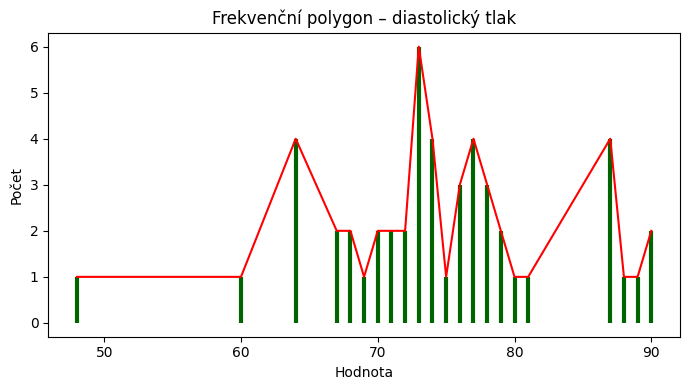

In [11]:
# ---------------------------------------------------
# 1. Načtení dat
# ---------------------------------------------------
policie = pd.read_csv(f"{current_dir}\\python-rewrite\\policie.csv", encoding="utf-8")

# Pomocné funkce
def freq_table(series, bins=None):
    """Vrací DataFrame s četnostmi (n, N, f, F)."""
    if bins is not None:
        counts, edges = np.histogram(series.dropna(), bins=bins)
        labels = [f"({edges[i]:.0f}, {edges[i+1]:.0f}]" for i in range(len(edges)-1)]
        ac = pd.Series(counts, index=labels)
    else:
        ac = series.value_counts().sort_index()
    kac = ac.cumsum()
    rc = (ac / ac.sum()).round(2)
    krc = rc.cumsum().round(2)
    return pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})


# ---------------------------------------------------
# 2. Frekvenční rozdělení – diastolický tlak
# ---------------------------------------------------
diast = pd.to_numeric(policie["diast"], errors="coerce").dropna()

ac = diast.value_counts().sort_index()
kac = ac.cumsum()
rc = (ac / ac.sum()).round(2)
krc = rc.cumsum().round(2)
freq_diast = pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})
print("Diastolický tlak – frekvenční rozdělení:\n")
print(freq_diast, "\n")

# Frekvenční polygon
x = ac.index.to_numpy()
y = ac.values
pasgr.freq_polygon(x, y, "Frekvenční polygon – diastolický tlak", "Hodnota", "Počet")


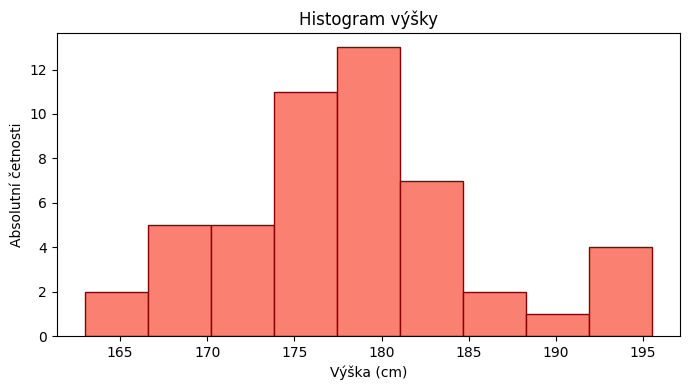

Výška – frekvenční rozdělení:

            n(i)  N(i)  f(i)  F(i)
(163, 166]     2     2  0.04  0.04
(166, 170]     5     7  0.10  0.14
(170, 173]     3    10  0.06  0.20
(173, 176]     8    18  0.16  0.36
(176, 179]    10    28  0.20  0.56
(179, 182]    12    40  0.24  0.80
(182, 186]     3    43  0.06  0.86
(186, 189]     3    46  0.06  0.92
(189, 192]     1    47  0.02  0.94
(192, 196]     3    50  0.06  1.00 



In [12]:
# ---------------------------------------------------
# 3. Výška – histogram + frekvenční rozdělení
# ---------------------------------------------------
vyska = pd.to_numeric(policie["height"], errors="coerce").dropna()

pasgr.histogram_with_labels(
    vyska,
    title="Histogram výšky",
    bins="auto",
    color="salmon",
    edgecolor="darkred",
    xlabel="Výška (cm)",
    ylabel="Absolutní četnosti"
)

counts, breaks = np.histogram(vyska, bins=10)
labels = [f"({breaks[i]:.0f}, {breaks[i+1]:.0f}]" for i in range(len(breaks)-1)]
ac = pd.Series(counts, index=labels)
kac = ac.cumsum()
rc = (ac / ac.sum()).round(2)
krc = rc.cumsum().round(2)
freq_vyska = pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})
print("Výška – frekvenční rozdělení:\n")
print(freq_vyska, "\n")


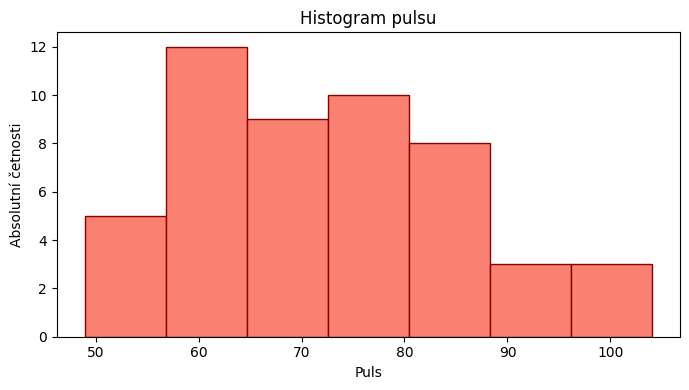

Puls – frekvenční rozdělení:

           n(i)  N(i)  f(i)  F(i)
(49, 54]      3     3  0.06  0.06
(54, 60]      3     6  0.06  0.12
(60, 66]     12    18  0.24  0.36
(66, 71]      5    23  0.10  0.46
(71, 76]      9    32  0.18  0.64
(76, 82]      6    38  0.12  0.76
(82, 88]      5    43  0.10  0.86
(88, 93]      4    47  0.08  0.94
(93, 98]      0    47  0.00  0.94
(98, 104]     3    50  0.06  1.00 



In [13]:

# ---------------------------------------------------
# 4. Puls – histogram + frekvenční rozdělení
# ---------------------------------------------------
puls = pd.to_numeric(policie["pulse"], errors="coerce").dropna()

pasgr.histogram_with_labels(
    puls,
    title="Histogram pulsu",
    bins="auto",
    color="salmon",
    edgecolor="darkred",
    xlabel="Puls",
    ylabel="Absolutní četnosti"
)

counts, breaks = np.histogram(puls, bins=10)
labels = [f"({breaks[i]:.0f}, {breaks[i+1]:.0f}]" for i in range(len(breaks)-1)]
ac = pd.Series(counts, index=labels)
kac = ac.cumsum()
rc = (ac / ac.sum()).round(2)
krc = rc.cumsum().round(2)
freq_puls = pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})
print("Puls – frekvenční rozdělení:\n")
print(freq_puls, "\n")

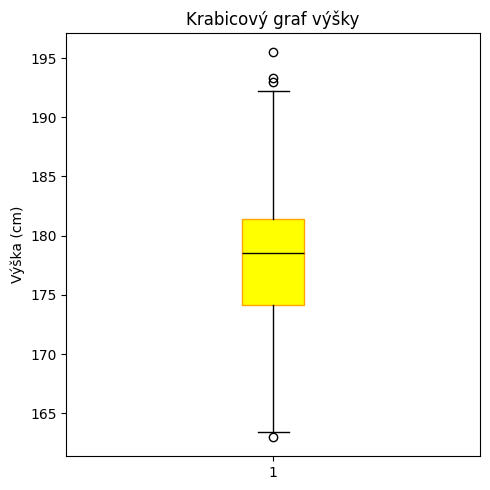

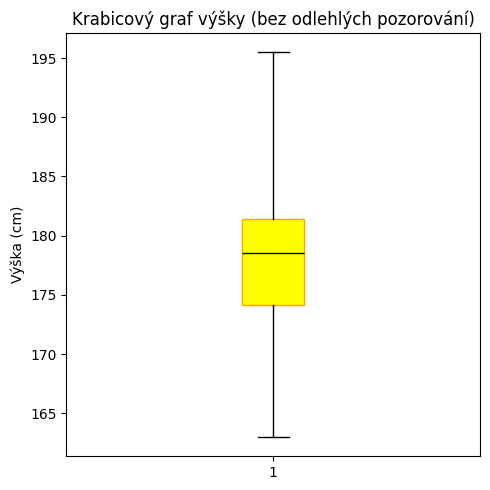

Výška – popisné statistiky polohy:

min: 163.0
max: 195.5
Q1: 174.175
Q3: 181.4
median: 178.5
five-number summary: [np.float64(163.0), np.float64(174.175), np.float64(178.5), np.float64(181.4), np.float64(195.5)]
mean: 178.28
summary():
 count     50.000000
mean     178.280000
std        7.178056
min      163.000000
25%      174.175000
50%      178.500000
75%      181.400000
max      195.500000
Name: height, dtype: float64 



In [14]:


# ---------------------------------------------------
# 5. Krabicový graf a kvantily – výška
# ---------------------------------------------------
pasgr.boxplot_with_labels(
    vyska,
    title="Krabicový graf výšky",
    ylabel="Výška (cm)",
    color="yellow",
    edgecolor="orange",
    median_color="black",
    showfliers=True
)


# Bez odlehlých
pasgr.boxplot_with_labels(
    vyska,
    title="Krabicový graf výšky (bez odlehlých pozorování)",
    ylabel="Výška (cm)",
    color="yellow",
    edgecolor="orange",
    median_color="black",
    showfliers=False,
    whis=3
)

# Kvantily / percentily
print("Výška – popisné statistiky polohy:\n")
print("min:", vyska.min())
print("max:", vyska.max())
print("Q1:", vyska.quantile(0.25))
print("Q3:", vyska.quantile(0.75))
print("median:", vyska.median())
print("five-number summary:", [vyska.min(), vyska.quantile(0.25), vyska.median(), vyska.quantile(0.75), vyska.max()])
print("mean:", vyska.mean())
print("summary():\n", vyska.describe(), "\n")


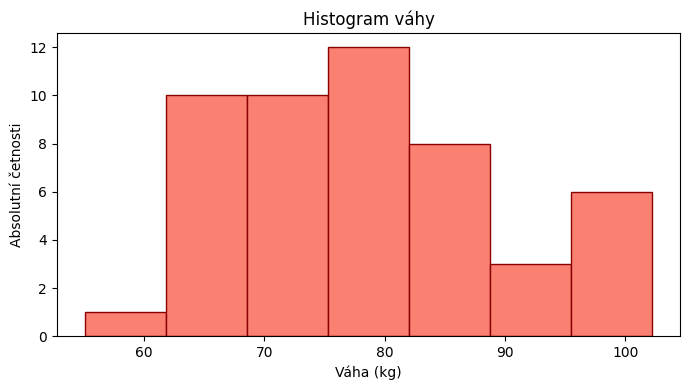

Váha – vážený průměr (odhad z histogramu): 78.27
summary():
 count     50.000000
mean      78.448000
std       11.452996
min       55.100000
25%       69.700000
50%       77.950000
75%       86.850000
max      102.200000
Name: weight, dtype: float64 



In [15]:

# ---------------------------------------------------
# 6. Hmotnost – histogram a průměr odhadem
# ---------------------------------------------------
vaha = pd.to_numeric(policie["weight"], errors="coerce").dropna()

pasgr.histogram_with_labels(
    vaha,
    title="Histogram váhy",
    bins="auto",
    color="salmon",
    edgecolor="darkred",
    xlabel="Váha (kg)",
    ylabel="Absolutní četnosti"
)


counts, mids = np.histogram(vaha, bins=10)
midpoints = 0.5 * (mids[1:] + mids[:-1])
weighted_mean = np.average(midpoints, weights=counts)
print("Váha – vážený průměr (odhad z histogramu):", round(weighted_mean, 2))
print("summary():\n", vaha.describe(), "\n")


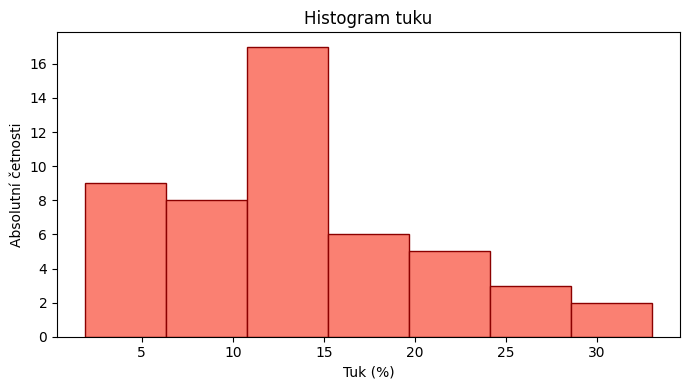

Tuk – popisné statistiky polohy:
 count    50.000000
mean     13.688000
std       7.391325
min       1.900000
25%       9.575000
50%      12.350000
75%      18.200000
max      33.000000
Name: fat, dtype: float64 



In [16]:

# ---------------------------------------------------
# 7. Tuk (%) – histogram + popisné statistiky
# ---------------------------------------------------
tuk = pd.to_numeric(policie["fat"], errors="coerce").dropna()
pasgr.histogram_with_labels(
    tuk,
    title="Histogram tuku",
    bins="auto",
    color="salmon",
    edgecolor="darkred",
    xlabel="Tuk (%)",
    ylabel="Absolutní četnosti"
)


print("Tuk – popisné statistiky polohy:\n", tuk.describe(), "\n")


In [18]:

# ---------------------------------------------------
# 8. Variabilita – výška
# ---------------------------------------------------
print("Výška – popisné statistiky variability:\n")
print("Rozptyl:", vyska.var())
print("Směr. odchylka:", vyska.std())
print("IQR:", vyska.quantile(0.75) - vyska.quantile(0.25))
print("MAD:", stats.median_abs_deviation(vyska))
print("Variabilita (koef. variace):", vyska.std() / vyska.mean())

# ---------------------------------------------------
# 9. Variabilita – váha
# ---------------------------------------------------
print("\nVáha – popisné statistiky variability:\n")
print("Rozptyl:", vaha.var())
print("Směr. odchylka:", vaha.std())
print("Koef. variace:", vaha.std() / vaha.mean())

# ---------------------------------------------------
# 10. Tvar rozdělení – výška
# ---------------------------------------------------
z_vyska = stats.zscore(vyska, nan_policy="omit")
print("\nZ-skóry – výška (ukázka):", z_vyska[:5])
print("Šikmost (skewness):", stats.skew(vyska, nan_policy="omit"))
print("Špičatost (kurtosis):", stats.kurtosis(vyska, nan_policy="omit"))

# ---------------------------------------------------
# 11. Tuk – tvar rozdělení
# ---------------------------------------------------
print("\nTuk – tvar rozdělení:\n")
print("Šikmost:", stats.skew(tuk, nan_policy='omit'))
print("Špičatost:", stats.kurtosis(tuk, nan_policy='omit'))


Výška – popisné statistiky variability:

Rozptyl: 51.524489795918385
Směr. odchylka: 7.178056129337412
IQR: 7.224999999999994
MAD: 3.5
Variabilita (koef. variace): 0.0402628232518365

Váha – popisné statistiky variability:

Rozptyl: 131.17111836734696
Směr. odchylka: 11.452996043278237
Koef. variace: 0.1459947486650805

Z-skóry – výška (ukázka): [ 0.18576079 -0.33493233 -1.39039135 -0.61638807  0.65016276]
Šikmost (skewness): 0.24006436510074095
Špičatost (kurtosis): 0.1779200665170788

Tuk – tvar rozdělení:

Šikmost: 0.6636229438266902
Špičatost: -0.07608876867067416


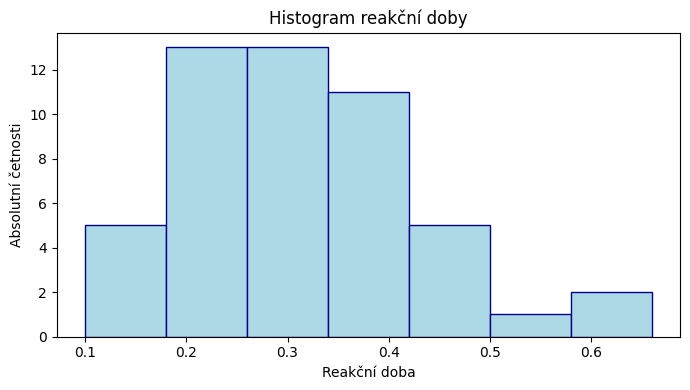

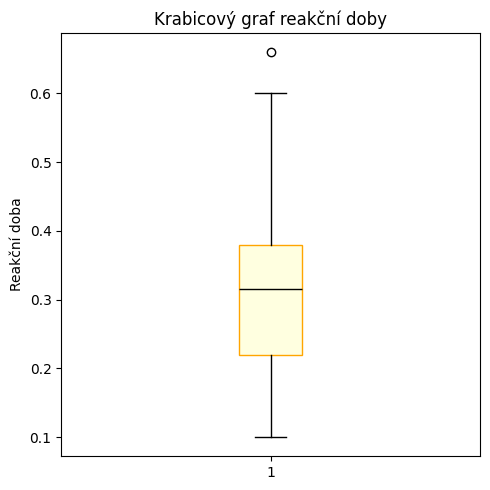

In [19]:

# ---------------------------------------------------
# 12. Reakční doba – histogram + boxplot
# ---------------------------------------------------
doba = pd.to_numeric(policie["react"], errors="coerce").dropna()
pasgr.histogram_with_labels(
    doba,
    title="Histogram reakční doby",
    bins="auto",
    color="lightblue",
    edgecolor="darkblue",
    xlabel="Reakční doba",
    ylabel="Absolutní četnosti"
)

pasgr.boxplot_with_labels(
    doba,
    title="Krabicový graf reakční doby",
    ylabel="Reakční doba",
    color="lightyellow",
    edgecolor="orange",
    median_color="black"
)


Výška – popisné statistiky variability:

Rozptyl: 51.524489795918385
Směr. odchylka: 7.178056129337412
IQR: 7.224999999999994
MAD: 3.5
Variabilita (koef. variace): 0.0402628232518365

Váha – popisné statistiky variability:

Rozptyl: 131.17111836734696
Směr. odchylka: 11.452996043278237
Koef. variace: 0.1459947486650805

Z-skóry – výška (ukázka): [ 0.18576079 -0.33493233 -1.39039135 -0.61638807  0.65016276]
Šikmost (skewness): 0.24006436510074095
Špičatost (kurtosis): 0.1779200665170788

Tuk – tvar rozdělení:

Šikmost: 0.6636229438266902
Špičatost: -0.07608876867067416


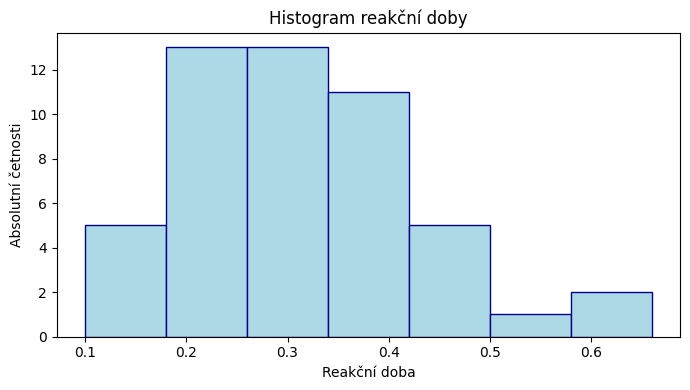

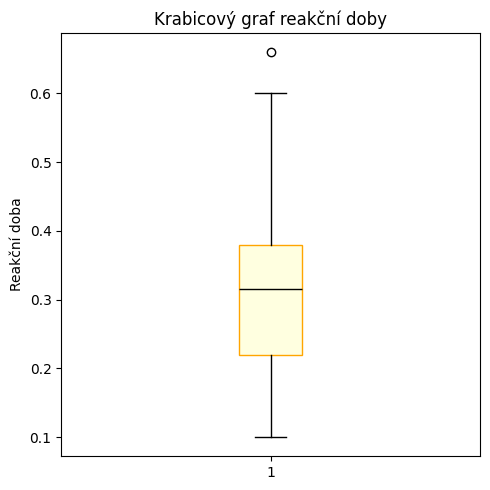


Vliv posunu a změny měřítka na statistiky:

           Průměr  Sm. odch.   Šikmost  Špičatost
vyska      178.28   7.178056  0.240064    0.17792
vyska+10   188.28   7.178056  0.240064    0.17792
vyska*10  1782.80  71.780561  0.240064    0.17792 



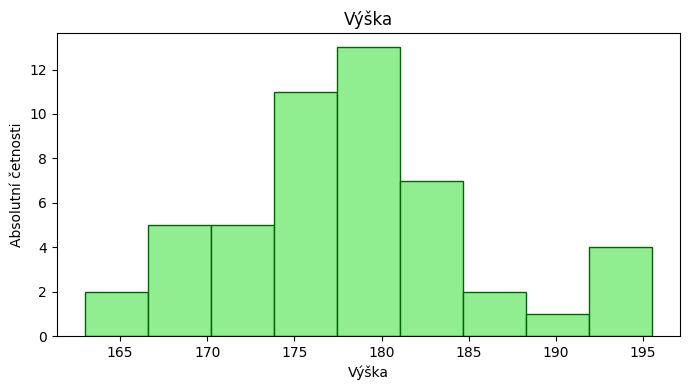

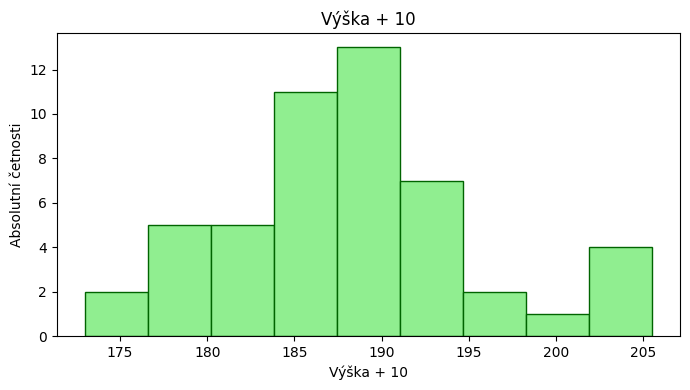

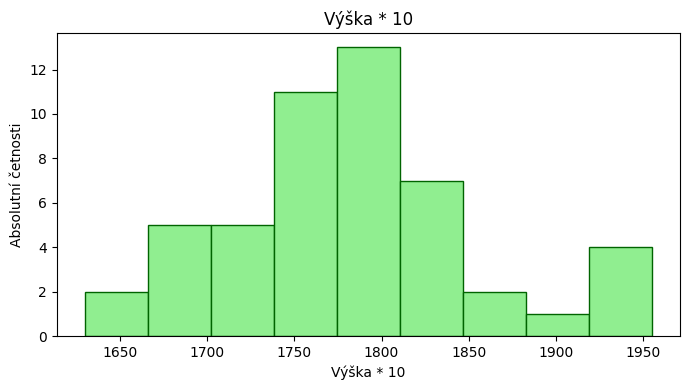

In [ ]:

# ---------------------------------------------------
# 13. Posun a změna měřítka (výška)
# ---------------------------------------------------
vyska_p = vyska + 10
vyska_m = vyska * 10

summary_shift = pd.DataFrame({
    "Průměr": [vyska.mean(), vyska_p.mean(), vyska_m.mean()],
    "Sm. odch.": [vyska.std(), vyska_p.std(), vyska_m.std()],
    "Šikmost": [stats.skew(vyska), stats.skew(vyska_p), stats.skew(vyska_m)],
    "Špičatost": [stats.kurtosis(vyska), stats.kurtosis(vyska_p), stats.kurtosis(vyska_m)]
}, index=["vyska", "vyska+10", "vyska*10"])

print("\nVliv posunu a změny měřítka na statistiky:\n")
print(summary_shift, "\n")
pasgr.histogram_with_labels(
    vyska,
    title="Výška",
    bins="auto",
    color="lightgreen",
    edgecolor="darkgreen",
    xlabel="Výška",
    ylabel="Absolutní četnosti"
)
pasgr.histogram_with_labels(
    vyska_p,
    title="Výška + 10",
    bins="auto",
    color="lightgreen",
    edgecolor="darkgreen",
    xlabel="Výška + 10",
    ylabel="Absolutní četnosti"
)
pasgr.histogram_with_labels(
    vyska_m,
    title="Výška * 10",
    bins="auto",
    color="lightgreen",
    edgecolor="darkgreen",
    xlabel="Výška * 10",
    ylabel="Absolutní četnosti"
)